In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import PIL
import urllib
import networkx as nx
from ImageCompressionSVD import ImageCompressionSVD
from SpectralCommunityDetection import SpectralCommunityDetection


In [3]:

def read_image(url):
    return np.array(PIL.Image.open(urllib.request.urlopen(url)))

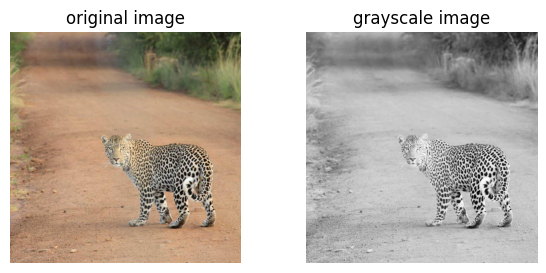

In [4]:
image_url = "https://fastly.picsum.photos/id/219/1200/1200.jpg?hmac=hVx7D_aNUjlmtlaYidaqbaIOhwFFYwkL1VrMXiFFFCY"
img = read_image(image_url)

img_grey = ImageCompressionSVD.to_grayscale_image(img)
ImageCompressionSVD.compare_images(img, img_grey, "original image", "grayscale image")


relative size for k = 2: 0.0033347222222222224


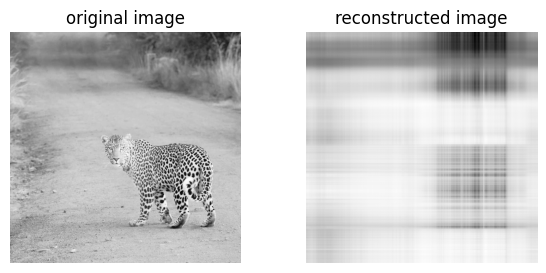

In [5]:
# ImageCompressionSVD.svd_reconstruct(img, 10)
# ImageCompressionSVD.svd_reconstruct(img, 50)
# ImageCompressionSVD.svd_reconstruct(img, 100)
# ImageCompressionSVD.svd_reconstruct(img, 200)
# k_values = [10, 50, 100, 200]
k_values = [2]
ImageCompressionSVD.svd_experiment(img, k_values)

threshold: 0.3333333333333333
k = 199


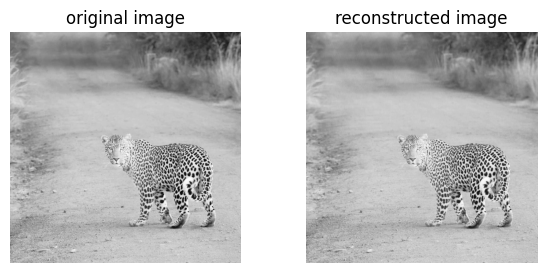

In [6]:
# I want to make the image 3x smaller
compression_factor = 3
k = ImageCompressionSVD.find_k_for_compression_threshold(img, compression_factor)
print(f"{k = }",)

ImageCompressionSVD.svd_reconstruct(img, k)



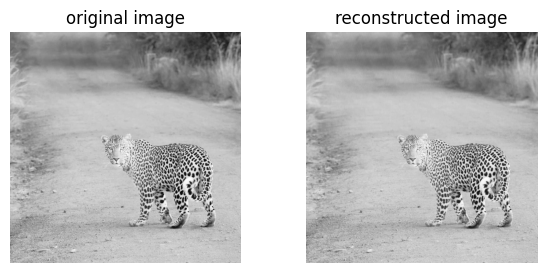

In [7]:
# I want to ignore all singular values less than epsilon

epsilon = 1e-4
ImageCompressionSVD.svd_reconstruct(img, k, epsilon)


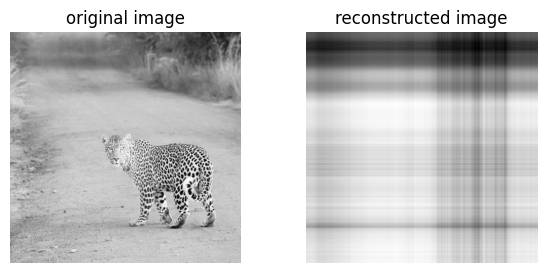

In [17]:
# What happens if epsilon is too large?

epsilon = 20000

ImageCompressionSVD.svd_reconstruct(img, k, epsilon)


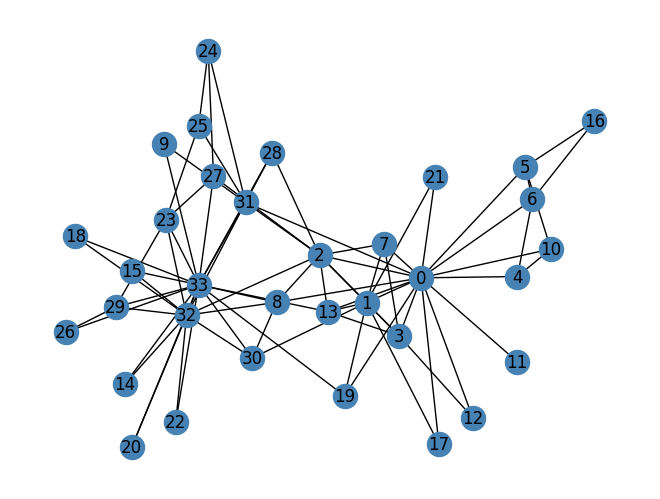

In [8]:
G = nx.karate_club_graph()
layout = nx.layout.fruchterman_reingold_layout(G)
nx.draw(G, layout, with_labels=True, node_color = "steelblue")

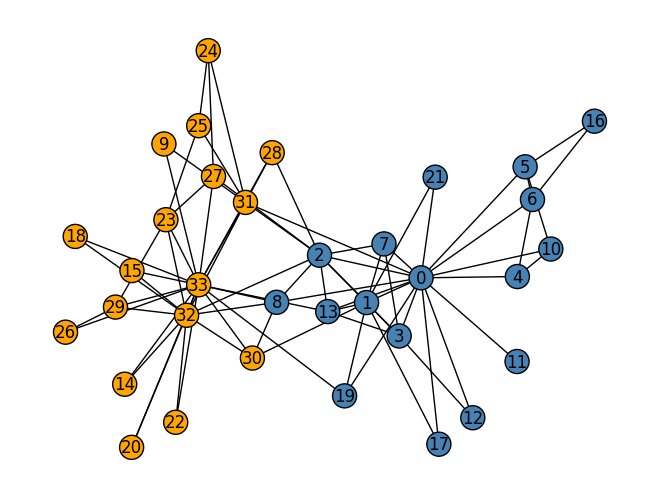

In [9]:
clubs = nx.get_node_attributes(G, "club")
nx.draw(G, layout,
        with_labels=True, 
        node_color = ["orange" if clubs[i] == "Officer" else "steelblue" for i in G.nodes()],
        edgecolors = "black" # confusingly, this is the color of node borders, not of edges
        ) 

In [10]:
communities = SpectralCommunityDetection.spectral_clustering(G, 2)
nx.draw(G, layout,
        with_labels=True,
        node_color = ["orange" if i in communities[0] else "steelblue" for i in G.nodes()],
        edgecolors = "black" # confusingly, this is the color of node borders, not of edges
        )


c:\Users\nich1\OneDrive\Documents\GitHub\middlebury-csci-0451\posts\unsupervised-learning\SpectralCommunityDetection.py:23: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(G).toarray()


TypeError: argument of type 'numpy.int32' is not iterable

We make the classic mistake of mislabeling individual 8.

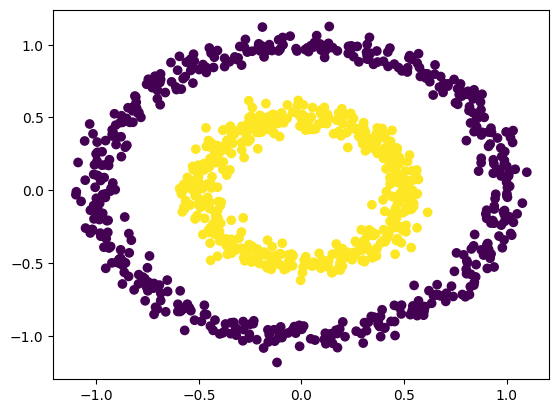

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5)

plt.scatter(X[:, 0], X[:, 1], c=y)

c:\Users\nich1\OneDrive\Documents\GitHub\middlebury-csci-0451\posts\unsupervised-learning\SpectralCommunityDetection.py:23: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(G).toarray()


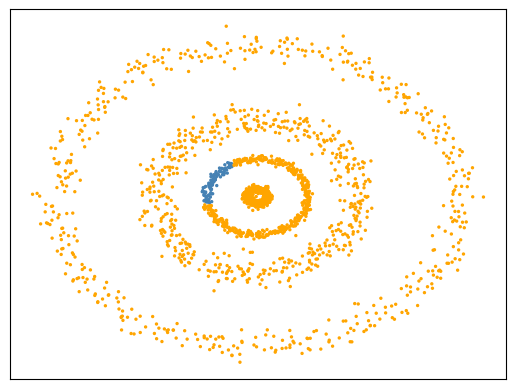

In [ ]:
GC = SpectralCommunityDetection.get_nearest_neighbor_graph(X, 5)
communities = SpectralCommunityDetection.spectral_clustering(GC, 2).tolist()

colors = ["orange", "steelblue"]

nx.draw_networkx_nodes(
    GC,
    pos = {i: X[i] for i in range(len(X))},
    node_color = [colors[i] for i in communities],
    node_size = 2
)

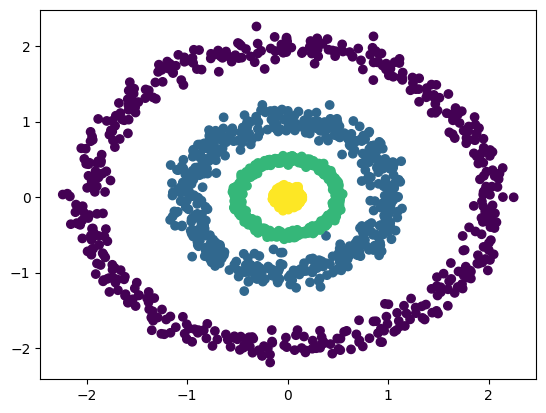

In [ ]:
# 4 rings

X_large, y_large = make_circles(n_samples=1000, noise=0.05, factor=0.5)
X_small, y_small = make_circles(n_samples=1000, noise=0.05, factor=0.2)

X_large[:, 0] *= 2
X_large[:, 1] *= 2
X_small[:, 0] *= 0.5
X_small[:, 1] *= 0.5
y_small += 2

X = np.concatenate([X_large, X_small])
y = np.concatenate([y_large, y_small])

plt.scatter(X[:, 0], X[:, 1], c=y)

c:\Users\nich1\OneDrive\Documents\GitHub\middlebury-csci-0451\posts\unsupervised-learning\SpectralCommunityDetection.py:23: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(G).toarray()


accuracy = 0.0005


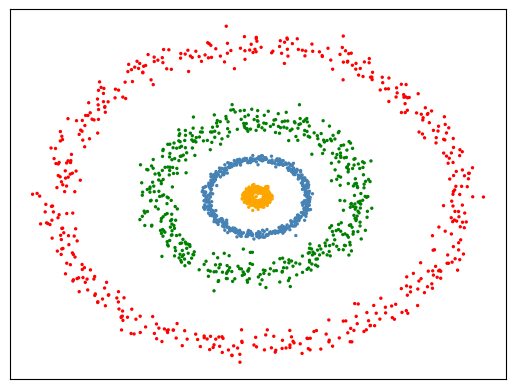

In [ ]:
GMC = SpectralCommunityDetection.get_nearest_neighbor_graph(X, 12)
communities = SpectralCommunityDetection.spectral_clustering(GMC, 4).tolist()


colors = ["orange", "steelblue", "green", "red"]

nx.draw_networkx_nodes(
    GMC,
    pos = {i: X[i] for i in range(len(X))},
    node_color = [colors[i] for i in communities],
    node_size = 2
)


For a measure of similarity $[0, 1]$ between two categorical labelings $z_1$ and $z_2$ that is permutation invariant, I propose we consider the averaged Jaccard Index about each point $i$: such that $sim(z_1, z_2) = \frac{1}{n}\sum_{i=1}^n 
J(label(z_1, i), label(z_2, i))$

where $label(z_i, j)$ = returns the label group $g_{i,j}$ of point $j$ in $z_i$. and where $J(g_{i,j}, g_{n, j})$ is the Jaccard Index between the group that contains point $j$ in $z_i$ and the group that contains point $j$ in $z_n$.



In [41]:
def jaccard_index(gi: list, gj: list):
    """compute the jaccard index between two node label groups"""
    return len(set(gi).intersection(set(gj))) / len(set(gi).union(set(gj)))


def averaged_jaccard_index_sim(labels:list, zi: list, zj: list):
    """compute the average jaccard index between node label groups in zi and zj"""

    zi_node_to_group_map = {node: group for node, group in enumerate(zi)}
    zj_node_to_group_map = {node: group for node, group in enumerate(zj)}

    zi_group_to_node_map = {group: [] for group in set(labels)}
    zj_group_to_node_map = {group: [] for group in set(labels)}

    for node, group in enumerate(zi):
        zi_group_to_node_map[group].append(node)
    
    for node, group in enumerate(zj):
        zj_group_to_node_map[group].append(node)

    jaccard_index_sum = 0
    for node, _ in enumerate(zi):
        zi_group = zi_node_to_group_map[node]
        zj_group = zj_node_to_group_map[node]
        zi_node_list = zi_group_to_node_map[zi_group]
        zj_node_list = zj_group_to_node_map[zj_group]

        jaccard_index_sum += jaccard_index(zi_node_list, zj_node_list)

    return jaccard_index_sum / len(zi)





In [42]:
actual_labeling = [0 if clubs[i] == "Officer" else 1 for i in G.nodes()]
predicted_labeling = SpectralCommunityDetection.spectral_clustering(G, 2)
labels = [0, 1]

sim = averaged_jaccard_index_sim(labels, actual_labeling, predicted_labeling)


# Test label invariance
actual_labeling = [1 if clubs[i] == "Officer" else 0 for i in G.nodes()]
predicted_labeling = SpectralCommunityDetection.spectral_clustering(G, 2)
labels = [0, 1]

sim2 = averaged_jaccard_index_sim(labels, actual_labeling, predicted_labeling)

print(f"{sim = }, {sim2 = }")

sim = 0.9159938485197995, sim2 = 0.9159938485197995


c:\Users\nich1\OneDrive\Documents\GitHub\middlebury-csci-0451\posts\unsupervised-learning\SpectralCommunityDetection.py:23: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(G).toarray()
c:\Users\nich1\OneDrive\Documents\GitHub\middlebury-csci-0451\posts\unsupervised-learning\SpectralCommunityDetection.py:23: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(G).toarray()
